# Selecting pixel coordinates from an image file

::: {admonition} Learning Objectives  
After completing this lesson, you should be able to:  
1. install a matplotlib extension for jupyterlab
2. open an image file into an interactive widget e.g. google map screen capture  
3. select points on the image using your mouse, recording their locations  
4. determine the scale to transform the pixel coordinates to real space coordinates  
5. use these calibrated points to make geometric calculations e.g. distance, angle, area, and perimeter.  
:::

*This is the first step in being able to reproduce and extract data from plots in the literature. Next week we will begin pulling data from publications, reanalyzing and then examing the validity of the author's conclusions.  In Senior Design, you may want to do something like this to directly plot data you collect along with data found in the literature for comparison.*   

::: {important}  
For this lesson, you will need to install a matplotlib extension to allow for interactive plots with jupyter lab. Open your powershell prompt from the Anaconda Navigator menu, type and execute the following:  **conda install -c conda-forge ipymply**  

It may give you a message that Anaconda is being downgraded.  That is okay, type "yes" to proceed.  *Then after it is finished make sure you close down jupyterlab and restart it.*  
:::


In [1]:
# the following line gives an interactive plot; default is %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

## Load and Display our image

The image below was a screen capture from google maps showing property lines for various tax parcels.  We would like to know the total acreage of this property.  We display an image by using `.subplots()` to create the figure and axes frame as we have done before but now we read an image `.imshow()` into the axes rather than plotting a set of data.   

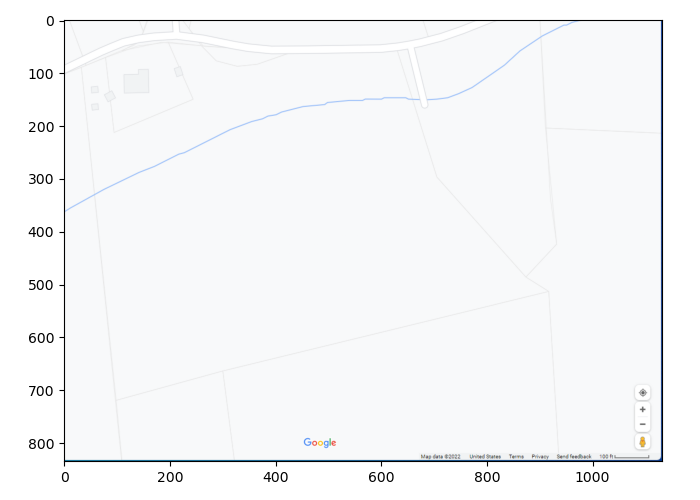

In [12]:
%matplotlib widget
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
img=mpimg.imread('../images/3114_06_smith_creek.png')
ax1.imshow(img)
imgsize=img.shape  #will use this below contains (ypixels, xpixels, colordepth)
fig.tight_layout()

:::{image} ../images/smith_creek_1.png
:height: 500px
:name: navigator
:align: center
:::

If you execute the code above in your own notebook and move your mouse around on the image, you will see the pixel coordinates for that location displayed at the bottom of the figure. The values in the brackets are the color code and opacity.  We won't need these.  One of the things to notice is that when an image is read, the data is plotted from the top left corner, across the row, and then down to the next row.  When dealing with coordinates for plots, we expect the origin to be located in the bottom-left corner so we will need to correct this next week when we read an image file of a data plot.  

## Selecting data from our image

The following code will make the above plot interactive.  There are several "events" that matplotlib can "listen" for.  The one we use below is a simple mouse click event.  When the cursor is moved on to the image and the mouse is left-clicked, the coordinate for the cursor location is stored into a variable we defined below called "pos" (short for position).  We also add a title to the plot with the location of the cursor for the last click event.  This is the only event type we will use in this class so don't worry about the code below just store it somewhere handy such as your cheatsheet for later use.  

In [13]:
#below all part of matplotlib -- remember for this to work we should have already run: %matplotlib widget
pos = []
def onclick(event):
    pos.append([event.xdata,event.ydata])
    ax1.set_title(f'Last click: [{event.xdata:.3f}, {event.ydata:.3f}]')
cid=fig.canvas.mpl_connect('button_press_event', onclick) 

After running the above code, it might look like nothing happened.  Scroll back up to the image plotted previously, and use the mouse to click somewhere.  You should now see a title show up showing you the location of your click (as shown in the figure below).  Now continue clicking a few points on the image.  After this we can take a look at the points stored in the variable "pos."  

:::{image} ../images/smith_creek_2.png
:height: 500px
:name: navigator
:align: center
:::

Now start over, re-executing the previous cells to make a new interactive plot so we can include calibration points for the image scale bar. Let's reclick on all your boundary points and then when finished with these click on the two ends of the scale bar.  This way we can just pull the last two points off of our "pos" values for the calibration.  We also should turn our list into a numpy array to make indexing easier when performing calculations.  The first point that we select is going to become a common vertice as we break our polygon into triangles so choose wisely.  Also the boundary points need to be chosen in order as you "walk" around the boundary.  

The points that I chose are shown below.  

```python  
display(pos)  

[[97.53271352771536, 716.9389926874768],
 [31.26412199934971, 90.22745566207607],
 [192.20212999680916, 37.212582439383596],
 [387.2211279231423, 65.61340738011177],
 [633.3616107427861, 59.93324239196613],
 [705.3103672592973, 292.8200069059368],
 [873.8219285742842, 484.05222817350614],
 [915.4764718206854, 514.3464414436162],
 [1042.333489889271, 826.7555157916255],
 [1106.708693088255, 828.6489041210074]]
```

In [32]:
# uncomment below to test code without selecting your own points
# pos=[[97.53271352771536, 716.9389926874768],
#  [31.26412199934971, 90.22745566207607],
#  [192.20212999680916, 37.212582439383596],
#  [387.2211279231423, 65.61340738011177],
#  [633.3616107427861, 59.93324239196613],
#  [705.3103672592973, 292.8200069059368],
#  [873.8219285742842, 484.05222817350614],
#  [915.4764718206854, 514.3464414436162],
#  [1042.333489889271, 826.7555157916255],
#  [1106.708693088255, 828.6489041210074]]

... and plotted on top of our previous image.  I've also numbered the points in the order that I selected them.  The last two points are on the ends of the scale bar and shown in red.  

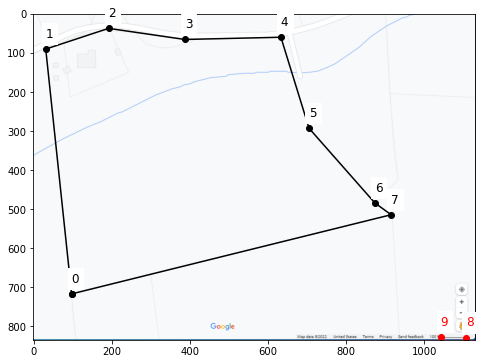

In [58]:
%matplotlib inline
pts=np.array(pos[0:-2]) # take all points except last 2
calibration_bar_ends=np.array(pos[-2:]) # take only last 2 points
calibration_bar_length=100 #feet
scale=calibration_bar_length/np.abs(calibration_bar_ends[0,0]-calibration_bar_ends[1,0])  #feet/pixel

plt.close(fig='all')
pts=np.append(pts,[pts[0]], axis=0) # making a copy of the first point and adding to our list to close our polygon when plotting
vert_pos=[[0,i+1,i+2] for i in np.arange(len(pts)-3)]
tri_data=[pts[vertices] for vertices in vert_pos]

fig1, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
img=mpimg.imread('../images/3114_06_smith_creek.png')
ax2.imshow(img) 
ax2.plot(pts[:,0],pts[:,1], 'ko-')
ax2.plot(calibration_bar_ends[:,0],calibration_bar_ends[:,1], 'ro')
[ax2.text(*pts[i]+(0,-30),str(i), size='large', backgroundcolor='white') for i in np.arange(len(pts)-1)]
[ax2.text(*calibration_bar_ends[i-len(pts)]+(0,-30),str(i), c='red', size='large', backgroundcolor='white') for i in np.arange(len(pts)-1, len(pts)+1)]
#[ax2.plot(tri_data[i][:,0], tri_data[i][:,1], '-') for i in np.arange(len(tri_data))]
plt.show()

## Calculate the area

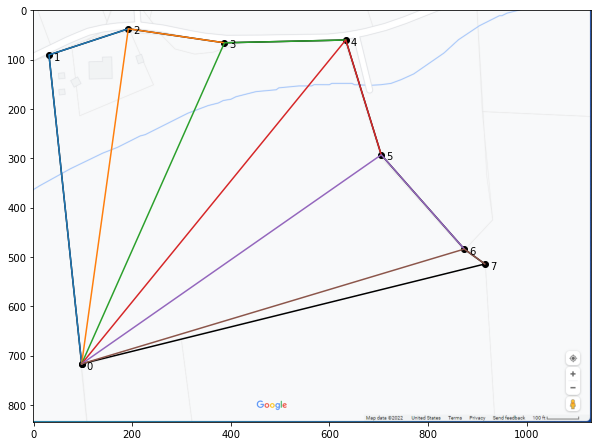

In [16]:
pts=np.array(pos[0:-2]) # take all points except last 2
calibration_bar_ends=np.array(pos[-2:]) # take only last 2 points
calibration_bar_length=100 #feet
scale=calibration_bar_length/np.abs(calibration_bar_ends[0,0]-calibration_bar_ends[1,0])  #feet/pixel

plt.close(fig='all')
pts=np.append(pts,[pts[0]], axis=0) # making a copy of the first point and adding to our list to close our polygon when plotting
vert_pos=[[0,i+1,i+2] for i in np.arange(len(pts)-3)]
tri_data=np.array([pts[vertices] for vertices in vert_pos])
fig1, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
img=mpimg.imread('../images/3114_06_smith_creek.png')
ax2.imshow(img) 
ax2.plot(pts[:,0],pts[:,1], 'ko-')
[ax2.text(*pts[i]+10,str(i)) for i in np.arange(len(pts)-1)]
[ax2.plot(tri_data[i,:,0], tri_data[i,:,1], '-') for i in np.arange(len(tri_data))]
plt.show()

Area of a triangle given the $\left(x,y\right)$ coordinates of the vertices $A,B,C$ =  
  
$$\frac{Ax(By - Cy) + Bx(Cy - Ay) + Cx(Ay - By)}{2} $$

In [17]:
def tri_area(vertice_list): #list of 3 vertices
    A,B,C=0,1,2
    x,y=0,1
    return np.abs((vertice_list[A,x]*(vertice_list[B,y]-vertice_list[C,y])+vertice_list[B,x]*(vertice_list[C,y]-vertice_list[A,y])+vertice_list[C,x]*(vertice_list[A,y]-vertice_list[B,y])))/2

area=0
area = sum([tri_area(i) for i in tri_data])
print(f'The area is approximately {area*scale**2:.0f} square feet')
print(f'The area is approximately {area*scale**2/43560:.1f} acres')

The area is approximately 954676 square feet
The area is approximately 21.9 acres


In a similar way, you could manipulate the data to calculate the perimeter of the bounded property, the length of a edge, or the angle formed between two edges, etc.

## Putting it all together

Let's calculate the total acreage north of the creek running through this property.  

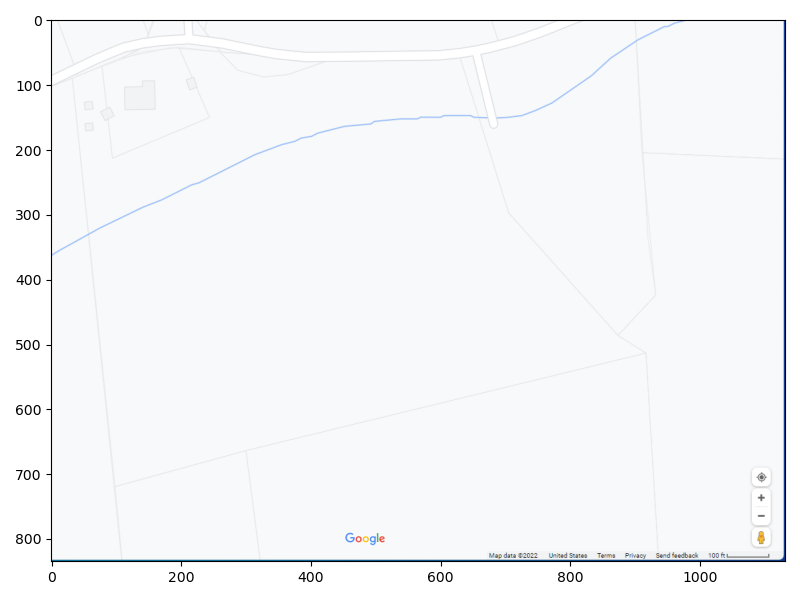

In [21]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
img=mpimg.imread('../images/3114_06_smith_creek.png')
ax1.imshow(img)
imgsize=img.shape  #will use this below contains (ypixels, xpixels, colordepth)
fig.tight_layout()

#below all part of matplotlib -- remember for this to work we should have already run: %matplotlib widget
pos = []
def onclick(event):
    pos.append([event.xdata,event.ydata])
    ax1.set_title(f'Last click: [{event.xdata:.3f}, {event.ydata:.3f}]')
cid=fig.canvas.mpl_connect('button_press_event', onclick) 

:::{image} ../images/smith_creek_1.png
:height: 500px
:name: navigator
:align: center
:::

cursor points that I used  
```python
[[29.630662779471038, 88.75061150009503],
 [168.4974442950987, 40.918720089156636],
 [299.6494046154137, 51.71946976259437],
 [631.3867160138575, 57.891326718844425],
 [657.6171080779206, 147.38325258447117],
 [531.094040474793, 153.55510954072133],
 [369.08279537322755, 187.5003228000969],
 [187.01301516384905, 267.7344632313485],
 [57.40401908259656, 329.45303279384973],
 [1041.8152036044905, 823.2015892938593],
 [1106.6197016451167, 824.7445535329218]]
```

In [30]:
# uncomment below to test code without selecting your own points
# pos=[[29.630662779471038, 88.75061150009503],
#  [168.4974442950987, 40.918720089156636],
#  [299.6494046154137, 51.71946976259437],
#  [631.3867160138575, 57.891326718844425],
#  [657.6171080779206, 147.38325258447117],
#  [531.094040474793, 153.55510954072133],
#  [369.08279537322755, 187.5003228000969],
#  [187.01301516384905, 267.7344632313485],
#  [57.40401908259656, 329.45303279384973],
#  [1041.8152036044905, 823.2015892938593],
#  [1106.6197016451167, 824.7445535329218]]

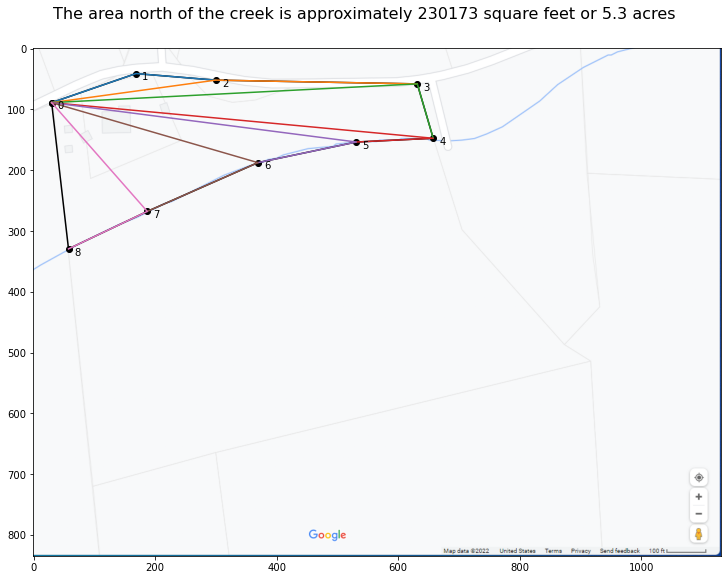

In [24]:
%matplotlib inline
pts=np.array(pos[0:-2]) # take all points except last 2
calibration_bar_ends=np.array(pos[-2:]) # take only last 2 points
calibration_bar_length=100 #feet
scale=calibration_bar_length/np.abs(calibration_bar_ends[0,0]-calibration_bar_ends[1,0])  #feet/pixel

#plt.close(fig='all')
pts=np.append(pts,[pts[0]], axis=0) # making a copy of the first point and adding to our list to close our polygon when plotting
vert_pos=[[0,i+1,i+2] for i in np.arange(len(pts)-3)]
tri_data=np.array([pts[vertices] for vertices in vert_pos])
fig1, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(10, 8),constrained_layout=True)
img=mpimg.imread('../images/3114_06_smith_creek.png')
ax2.imshow(img) 
ax2.plot(pts[:,0],pts[:,1], 'ko-')
[ax2.text(*pts[i]+10,str(i)) for i in np.arange(len(pts)-1)]
[ax2.plot(tri_data[i,:,0], tri_data[i,:,1], '-') for i in np.arange(len(tri_data))]
area=0
area = sum([tri_area(i) for i in tri_data])
fig1.suptitle(f'The area north of the creek is approximately {area*scale**2:.0f} square feet or {area*scale**2/43560:.1f} acres', fontsize=16)
plt.show()

## Exercises

### Problem 1

Look up the google map view of the "Five hundred meter Aperture Spherical Telescope" in China.  Method 1: Assuming the dish is circular, choose three well spaced points along the perimeter (forming a triangle).  Find the equation for the circumscribed circle for this triangle. Use the equation for the circle to calculate the total area of this structure.  Method 2: Select at least 40 well spaced points along the perimeter of this structure. Break this polygon up into triangles (as in the lesson) and estimate the total area by finding the area for each triangle.  Compare the results.  

### Problem 2

Take a screen capture of the Sea of Galilee, the Dead Sea, or Lake Ontario using Google maps.  Make sure you also include the scale bar with the image. Using at least 40 points evenly spaced around the perimeter, calculate the total surface area of the sea.  Also find the average width of your body of water.  You can can just select two points that you think estimate the width and use these.  

### Problem 3

Look up the google map view of Stonehenge, UK.  Approximating stonehenge as a circle, choose three well spaced points along the circular perimeter (forming a triangle).  Find the equation for the circumscribed circle of this triangle. Use the equation for the circle to calculate the total area of this structure.  Method 2: Select at least 20 well spaced points along the perimeter of this structure. Break this polygon up into triangles (as in the lesson) and estimate the total area by finding the area for each triangle.  Compare the results. Pick one of the stones and determine the stone thickness.  

### Problem 4

Find the total surface area of pandapas pond, Virginia.  There is also a walking path around the perimeter of the pond.  Find the total walking path length.   

### Problem 5

Take a screenshot of the Virginia Tech campus using google maps.  Determine the area of the drill field.  2) Determine the shortest distance that one must walk to get from Holden Hall to the Duck Pond.  Make sure you have enough resolution in your map image to follow only walking paths.  No cutting through lawns or cutting through buildings.  The tunnel through Burruss is fair game if that helps.  

### Problem 6

Using a screenshot in google maps of the pentagon.  Determine the total area including the green space in the center.  Also find the distance from the center of one of the pentagon's sides to the opposite vertex. To do this, use only the values you have for the 5 vertices.  

### Problem 7

Write a function that will take a list of points along a path and will return the total path distance. Note: if given only two points this function would simply calculate the distance.  